In [1]:
import numpy as np    
import pandas as pd     
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
cd 

C:\Users\JDL


In [4]:
cd Desktop

C:\Users\JDL\Desktop


In [5]:
power= pd.read_csv('2019 태양광 발전 경진대회/Refined Data/please.csv', index_col=0)

In [238]:
power2 = pd.read_excel('2019 태양광 발전 경진대회/Refined Data/last_final_data.xlsx', index_col=0)

In [422]:
power.columns

Index(['일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)',
       '중하층운량(10분위)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', '1시간평균 미세먼지농도(㎍/㎥)', 'hour',
       '태양광 전력거래량\n(단위: MWh)', 'month'],
      dtype='object')

In [240]:
power2.columns

Index(['일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)',
       '중하층운량(10분위)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'hour', '1시간평균 미세먼지농도(㎍/㎥)',
       '태양광 전력거래량\n(단위: MWh)'],
      dtype='object')

In [241]:
a = power[['해면압(hPa)', '해면기압(hPa)', '증기압(hPa)']]

KeyError: "['해면압(hPa)'] not in index"

In [ ]:
a.head(20)

In [409]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14284 entries, 0 to 14646
Data columns (total 22 columns):
일시                     14284 non-null object
기온(°C)                 14284 non-null float64
강수량(mm)                14284 non-null float64
풍속(m/s)                14284 non-null float64
습도(%)                  14284 non-null float64
증기압(hPa)               14284 non-null float64
이슬점온도(°C)              14284 non-null float64
현지기압(hPa)              14284 non-null float64
해면기압(hPa)              14284 non-null float64
일조(hr)                 14284 non-null float64
일사(MJ/m2)              14284 non-null float64
전운량(10분위)              14284 non-null float64
중하층운량(10분위)            14284 non-null float64
지면온도(°C)               14284 non-null float64
5cm 지중온도(°C)           14284 non-null float64
10cm 지중온도(°C)          14284 non-null float64
20cm 지중온도(°C)          14284 non-null float64
30cm 지중온도(°C)          14284 non-null float64
1시간평균 미세먼지농도(㎍/㎥)      14284 non-null float64
hour              

In [426]:
power = power.fillna(0)

In [32]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(power)

NameError: name 'missing_values_table' is not defined

In [429]:
power.head()

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),...,중하층운량(10분위),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),1시간평균 미세먼지농도(㎍/㎥),hour,태양광 전력거래량 (단위: MWh),month
0,2017-07-01 01:00:00,24.8,0.0,2.1,88.0,27.3,22.5,1002.6,1008.5,0.0,...,7.0,23.9,24.4,23.5,24.5,24.2,12.0,1,0.000000,7
1,2017-07-01 03:00:00,24.4,0.0,0.9,89.0,27.1,22.4,1001.9,1007.8,0.0,...,9.0,23.8,24.2,23.3,24.3,24.2,18.0,3,0.000000,7
2,2017-07-01 05:00:00,24.1,0.0,0.7,92.0,27.6,22.7,1001.8,1007.8,0.0,...,4.0,23.8,24.0,23.1,24.2,24.1,21.0,5,0.000000,7
3,2017-07-01 06:00:00,24.5,0.0,2.0,89.0,27.4,22.6,1002.2,1008.1,0.0,...,6.0,23.9,24.0,23.0,24.2,24.0,14.0,6,0.000000,7
4,2017-07-01 07:00:00,24.4,0.0,2.8,90.0,27.5,22.6,1002.6,1008.5,0.0,...,8.0,24.2,24.0,23.0,24.1,24.0,20.0,7,0.044248,7


In [9]:
power.set_index(power['일시'], inplace=True)
power['일시'] = pd.to_datetime(power['일시'], errors='coerce')
#power['월'] = power['일시'].dt.month
power['시간'] = power['hour']
power['월'] = power['month']
power = power.drop('일시', axis = 1)
power = power.drop('hour', axis = 1)
power = power.drop('month', axis = 1)
#power = power.drop('강수량(mm)', axis = 1)
#power = power.drop('해면압(hPa)', axis = 1)

In [10]:
split_date = '2019-04-01'

power_train = power.loc[power.index < split_date]
power_test = power.loc[power.index >= split_date]

In [432]:
power_train.tail()

,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),...,중하층운량(10분위),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),1시간평균 미세먼지농도(㎍/㎥),태양광 전력거래량 (단위: MWh),시간,월
일시,,,,,,,,,,,,,,,,,,,,,
2019-03-31 17:00:00,6.5,0.0,7.3,39.0,3.8,-6.5,1015.5,1022.2,0.8,1.62,...,4.0,13.8,12.1,12.2,11.3,10.2,18.0,2.998143,17,3
2019-03-31 18:00:00,5.5,0.0,3.9,42.0,3.8,-6.5,1015.8,1022.6,0.4,0.95,...,3.0,8.9,11.3,11.7,11.3,10.2,23.0,1.465061,18,3
2019-03-31 19:00:00,4.8,0.0,2.7,44.0,3.8,-6.6,1016.5,1023.4,0.0,0.00,...,0.0,5.6,10.2,10.7,11.3,10.3,20.0,0.246952,19,3
2019-03-31 20:00:00,4.3,0.0,3.8,44.0,3.6,-6.9,1017.1,1023.9,0.0,0.00,...,0.0,3.9,9.3,9.8,11.0,10.4,18.0,0.000000,20,3
2019-03-31 21:00:00,4.1,0.0,3.2,46.0,3.7,-6.6,1017.9,1024.8,0.0,0.00,...,1.0,3.1,8.6,8.9,10.8,10.4,13.0,0.000000,21,3


In [18]:
power_test.head()

,기온(°C),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),1시간평균 미세먼지농도(㎍/㎥),태양광 전력거래량 (단위: MWh),시간,월
일시,,,,,,,,,,,,,,,,,,,,
2019-04-01,3.8,3.9,52.0,4.1,-5.3,1018.1,1025.005925,0.0,0.0,0.0,0.0,1.9,7.3,7.7,10.0,10.2,12.0,0.0,0,4
2019-04-01,3.4,3.7,52.0,4.0,-5.5,1018.0,1024.887168,0.0,0.0,0.0,0.0,1.5,6.9,7.3,9.8,10.0,10.0,0.0,1,4
2019-04-01,3.0,2.9,53.0,4.0,-5.5,1017.9,1024.776540,0.0,0.0,0.0,0.0,1.0,6.5,7.1,9.5,9.9,12.0,0.0,2,4
2019-04-01,3.1,3.1,53.0,4.1,-5.4,1017.8,1024.705925,0.0,0.0,0.0,0.0,0.9,6.3,6.7,9.3,9.9,9.0,0.0,3,4
2019-04-01,2.7,2.8,57.0,4.3,-5.0,1017.7,1024.557489,0.0,0.0,0.0,0.0,0.6,6.0,6.3,9.2,9.7,9.0,0.0,4,4


In [433]:
power_train.columns

Index(['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)',
       '중하층운량(10분위)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', '1시간평균 미세먼지농도(㎍/㎥)',
       '태양광 전력거래량\n(단위: MWh)', '시간', '월'],
      dtype='object')

In [11]:
x_train = power_train.drop('태양광 전력거래량\n(단위: MWh)', axis =1)
x_train = x_train.drop('시간',axis=1)
x_train = x_train.drop('월',axis=1)
x_test = power_test.drop('태양광 전력거래량\n(단위: MWh)', axis =1)
x_test = x_test.drop('시간', axis =1)
x_test = x_test.drop('월', axis =1)
y_train = power_train['태양광 전력거래량\n(단위: MWh)']
y_test = power_test['태양광 전력거래량\n(단위: MWh)']                           

In [12]:
x_train.columns

Index(['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)',
       '중하층운량(10분위)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', '1시간평균 미세먼지농도(㎍/㎥)'],
      dtype='object')

In [13]:
reg = xgb.XGBRegressor()
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

C:\Users\JDL\Anaconda3\envs\venv\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\JDL\Anaconda3\envs\venv\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [14]:
start_date = '2019-04-01'
end_date = '2019-04-03'

power_test_1 = x_test.loc[x_test.index >= start_date]
power_test_prediction = power_test_1.loc[power_test_1.index < end_date]
    
true = y_test.loc[y_test.index >= start_date]    
y_true = true.loc[true.index < end_date]    
       
y_pred = reg.predict(power_test_prediction)

In [15]:
print(len(y_true), len(y_pred))

43 43


In [16]:
def nmae(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/7.381)) #mean sq로 해보자.

In [17]:
print('nMAE:',nmae(y_true=y_true,
                   y_pred=y_pred))

nMAE: 0.04154404057378985


In [18]:
pred = reg.predict(x_test)
print('nMAE:',nmae(y_true=y_test,
                   y_pred=pred))

nMAE: 0.03992606467481814


In [41]:
a = pd.DataFrame()
a['MWh real'] = y_test
a['MWh prediction'] = pred
b = a.reset_index(drop=True)
c = b[:54]

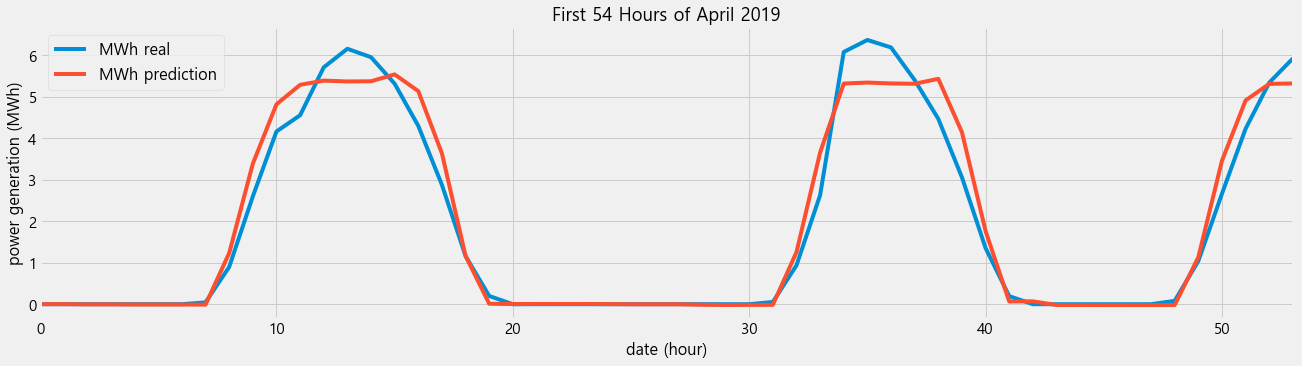

In [42]:
gen1 = c.plot(figsize=(20, 5))
gen1.set_title("First 54 Hours of April 2019", fontsize = 18)
plt.legend(fontsize=16)
gen1.tick_params(which='minor', length=2)
plt.ylabel('power generation (MWh)', fontsize = 16)
plt.xlabel('date (hour)', fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
f = gen1.get_figure()

No handles with labels found to put in legend.


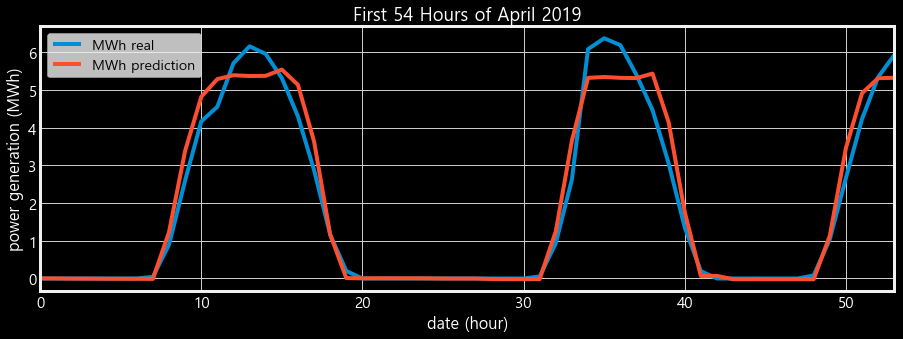

In [43]:
fig = plt.figure()
fig.set_facecolor('k')
ax1 = fig.add_subplot(2,2, 1)
ax1.set_facecolor('k')
ax1.tick_params(axis='x', colors='w')
ax1.tick_params(axis='y', colors='w')
ax1.legend(fontsize=16)
ax1.tick_params(which='minor', length=2)
plt.ylabel('power generation (MWh)', fontsize = 16, color = 'w')
plt.xlabel('date (hour)', fontsize = 16, color='w')
plt.xticks(fontsize = 15, color='w')
plt.yticks(fontsize = 15, color='w')
t = ax1.set_title("First 54 Hours of April 2019", fontsize = 18, color='w')
gen1 = c.plot(figsize=(30, 10), ax = ax1)

In [77]:
fg = f.savefig('solar_gen_compare.png')

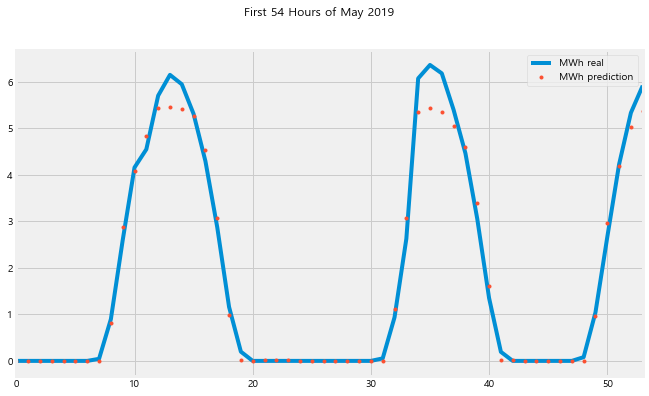

In [48]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(10)
_ = b[:54].plot(ax=ax, style=['-','.'])
                                         
plot = plt.suptitle('First 54 Hours of May 2019')

In [19]:
import pickle
import skater
import eli5
import shap
shap.initjs()
import warnings

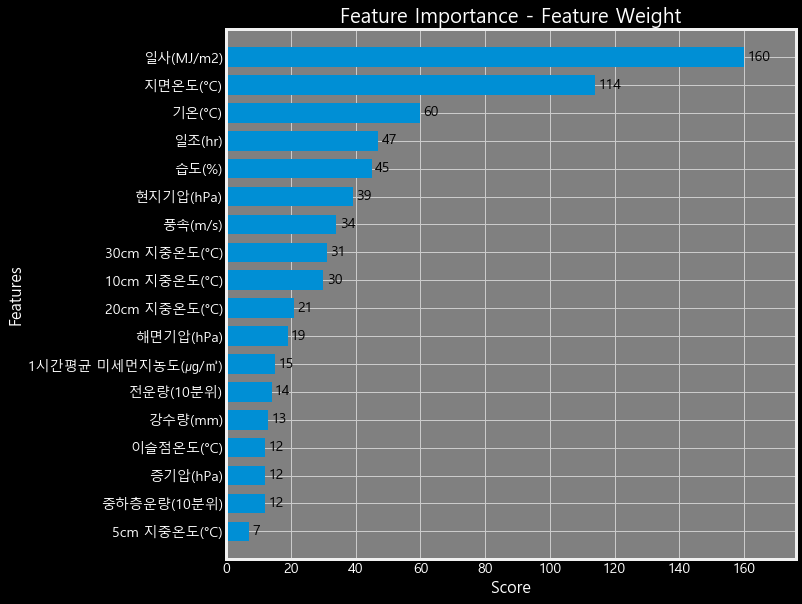

In [44]:
fig = plt.figure(figsize = (20, 20))
fig.set_facecolor('k')
ax1 = fig.add_subplot(2,2, 1)
ax1.set_facecolor('grey')
ax1.tick_params(axis='x', colors='w')
ax1.tick_params(axis='y', colors='w')
plt.ylabel('features', fontsize = 16, color = 'w')
plt.xlabel('score', fontsize = 16, color='w')
f1 = plot_importance(reg, xlabel='Score', ylabel='Features', importance_type='weight', height = 0.7, ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight", color ='w')

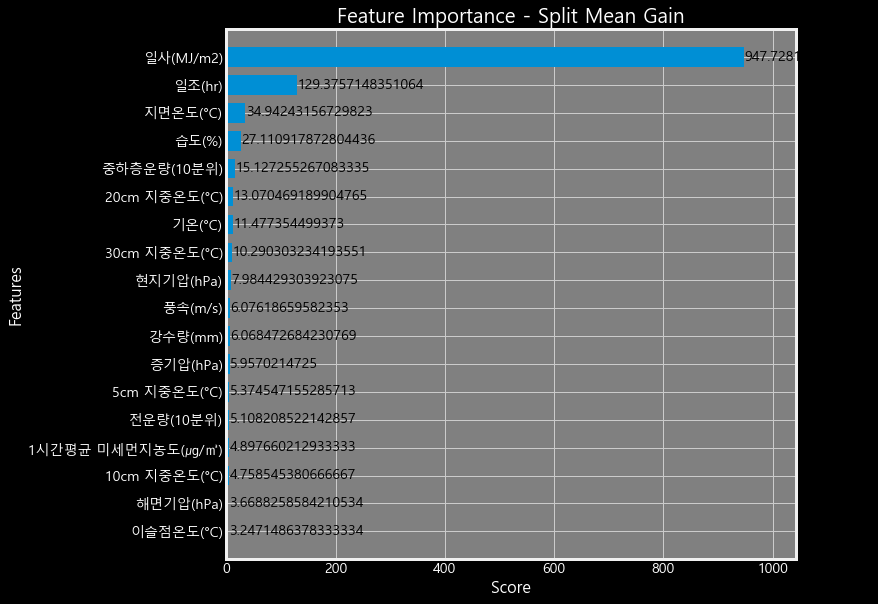

In [45]:
fig = plt.figure(figsize = (20, 20))
fig.set_facecolor('k')
ax1 = fig.add_subplot(2,2, 1)
ax1.set_facecolor('grey')
ax1.tick_params(axis='x', colors='w')
ax1.tick_params(axis='y', colors='w')
plt.ylabel('features', fontsize = 16, color = 'w')
plt.xlabel('F score', fontsize = 16, color='w')
f1 = plot_importance(reg, xlabel='Score', ylabel='Features', importance_type='gain', height = 0.7, ax=ax1)
t=ax1.set_title("Feature Importance - Split Mean Gain", color ='w')

In [446]:
# Interpretations with Skater

In [27]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from skater.util.logger import _INFO, _DEBUG
interpreter = Interpretation(training_data=x_test, training_labels=y_test, 
                             feature_names=list(x_test.columns))

im_model = InMemoryModel(reg.predict, examples=x_test, model_type='regressor', 
                         feature_names=list(x_test.columns), log_level=_INFO)

2019-08-28 11:08:41,962 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[20/20] features ████████████████████ Time elapsed: 9 seconds

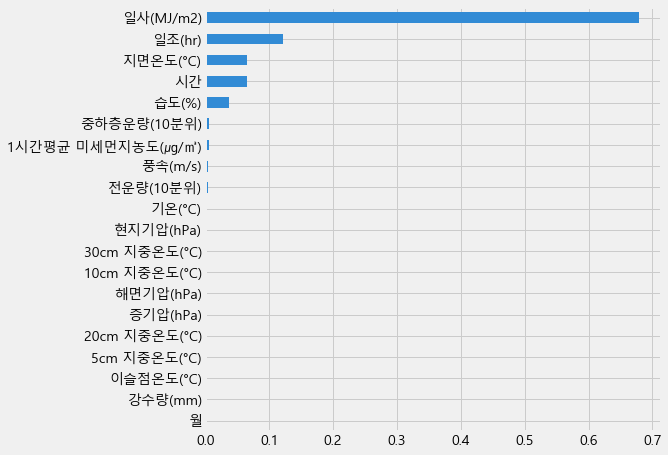

In [28]:
fig = plt.figure(figsize = (16, 16))
ax1 = fig.add_subplot(2,2, 1)
plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=True,  n_samples=100000, ax=ax1)

2019-08-29 10:29:34,711 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[18/18] features ████████████████████ Time elapsed: 14 seconds

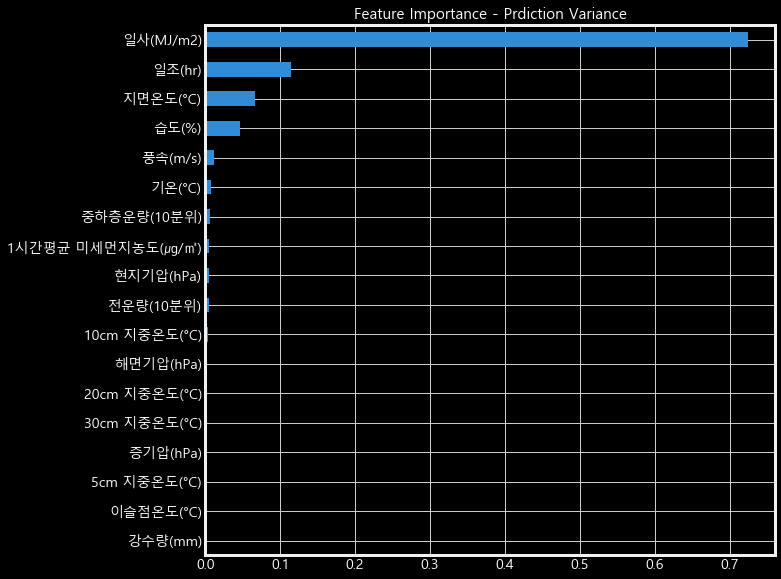

In [46]:
fig = plt.figure(figsize = (20, 20))
fig.set_facecolor('k')
ax1 = fig.add_subplot(2,2, 1)
ax1.set_facecolor('k')
ax1.tick_params(axis='x', colors='w')
ax1.tick_params(axis='y', colors='w')
plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=True,  n_samples=100000, ax=ax1)
t=ax1.set_title("Feature Importance - Prdiction Variance", fontsize = 15, color ='w')

In [199]:
x_test.columns

Index(['기온(°C)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)',
       '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)', '1시간평균 미세먼지농도(㎍/㎥)', '시간', '월'],
      dtype='object')

2019-08-29 10:32:58,013 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[50/50] grid cells ████████████████████ Time elapsed: 14 seconds

2019-08-29 10:33:16,556 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[11/11] grid cells ████████████████████ Time elapsed: 8 seconds

2019-08-29 10:33:29,648 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[43/43] grid cells ████████████████████ Time elapsed: 13 seconds

[[<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1b608c85518>],
 [<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1b609be0828>],
 [<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1b607e99240>]]

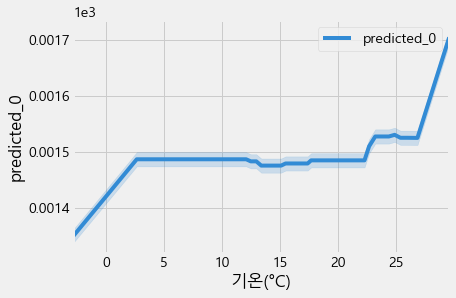

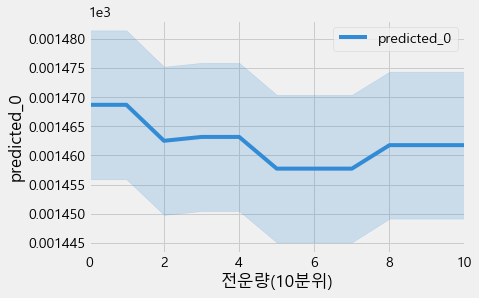

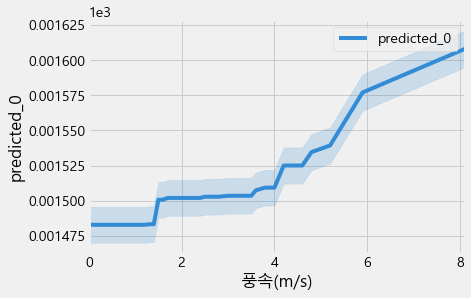

In [48]:
pdp_features = ['기온(°C)', '전운량(10분위)',  '풍속(m/s)']
interpreter.partial_dependence.plot_partial_dependence(pdp_features, im_model, grid_resolution=50, grid_range=(0,1), n_samples=23000, with_variance=True, figsize = (6, 4))                                                                                               

In [31]:
interpreter_train = Interpretation(training_data=x_train, training_labels=y_train, 
                             feature_names=list(x_train.columns))

im_model_train = InMemoryModel(reg.predict, examples=x_train, model_type='regressor', 
                         feature_names=list(x_train.columns), log_level=_INFO)

2019-08-28 11:11:52,479 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[12/12] grid cells ████████████████████ Time elapsed: 10 seconds

[[<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1ef802742e8>]]

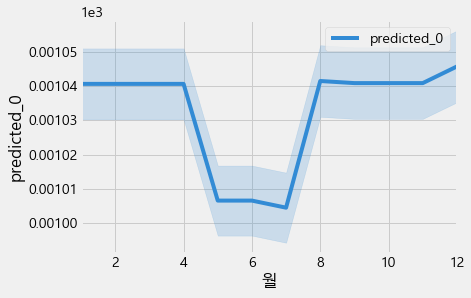

In [32]:
pdp_features = ['월']
interpreter_train.partial_dependence.plot_partial_dependence(pdp_features, im_model_train, grid_resolution=50, grid_range=(0,1), n_samples=23000, with_variance=True, figsize = (6, 4))

2019-08-28 11:12:24,422 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[1/1] grid cells ████████████████████ Time elapsed: 4 seconds

[[<Figure size 432x288 with 1 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1effe66cd68>]]

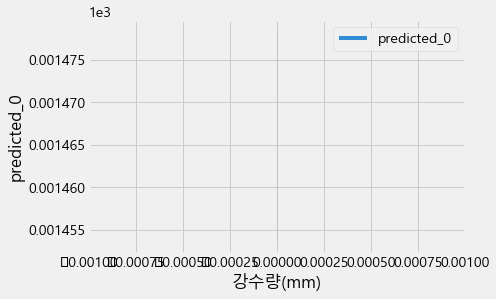

In [35]:
pdp_features = ['강수량(mm)']
interpreter.partial_dependence.plot_partial_dependence(pdp_features, im_model, grid_resolution=50, grid_range=(0,1), n_samples=23000, with_variance=True, figsize = (6, 4))

In [49]:
eli5.show_weights(reg)

Weight,Feature
0.7629,일사(MJ/m2)
0.1041,일조(hr)
0.0281,지면온도(°C)
0.0218,습도(%)
0.0122,중하층운량(10분위)
0.0105,20cm 지중온도(°C)
0.0092,기온(°C)
0.0083,30cm 지중온도(°C)
0.0064,현지기압(hPa)
0.0049,풍속(m/s)


In [215]:
pred[10]

4.190378

In [50]:
doc_num = 94
print('Actual Label:', y_test.iloc[doc_num])
print('Predicted Label:', pred[doc_num])
error = nmae(y_true= y_test.iloc[doc_num], y_pred=pred[doc_num])  
print('nmae :',error)
eli5.show_prediction(reg.get_booster(), x_test.iloc[doc_num], 
                     feature_names=list(x_test.columns),
                     show_feature_values=True)

Actual Label: 5.337983
Predicted Label: 3.6885626
nmae : 0.22346841463120778


In [51]:
doc_num = 10
print('Actual Label:', y_test.iloc[doc_num])
print('Predicted Label:', pred[doc_num])
error = nmae(y_true= y_test.iloc[doc_num], y_pred=pred[doc_num])  
print('nmae :',error)
eli5.show_prediction(reg.get_booster(), x_test.iloc[doc_num], 
                     feature_names=list(x_test.columns),
                     show_feature_values=True)

Actual Label: 4.159811
Predicted Label: 4.813805
nmae : 0.08860508105974821


In [451]:
import shap
shap.initjs()

In [21]:
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(x_test)
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values).head()

Expected Value: 1.0462568


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.004053,-0.001793,0.010643,0.033531,-0.000844,-0.000254,0.015820,0.001527,-0.114797,-0.773714,-0.00013,0.001646,-0.217833,-0.018791,0.011129,0.013536,0.004197,-0.013096
1,0.004053,-0.001793,0.009802,0.033734,-0.000844,-0.000254,0.015820,0.001527,-0.114747,-0.773511,-0.00013,0.001646,-0.217833,-0.018791,0.011129,0.013536,0.004506,-0.013021
2,0.004053,-0.001793,0.001661,0.033734,-0.000844,-0.000254,0.015820,0.001527,-0.111398,-0.774080,-0.00013,0.001646,-0.218729,-0.018791,0.011680,0.013536,0.005057,-0.013021
3,0.004053,-0.001793,0.001661,0.033734,-0.000844,-0.000254,0.015820,0.001527,-0.111398,-0.774080,-0.00013,0.001646,-0.218729,-0.018791,0.011680,0.013536,0.005057,-0.013021
4,0.004053,-0.001793,0.000126,0.005920,0.000359,-0.000254,0.016156,0.001527,-0.105369,-0.765326,-0.00013,0.001654,-0.210599,-0.018791,0.011680,0.013409,0.006528,-0.013021


In [22]:
np.mean(y_train)

1.0462681759570673

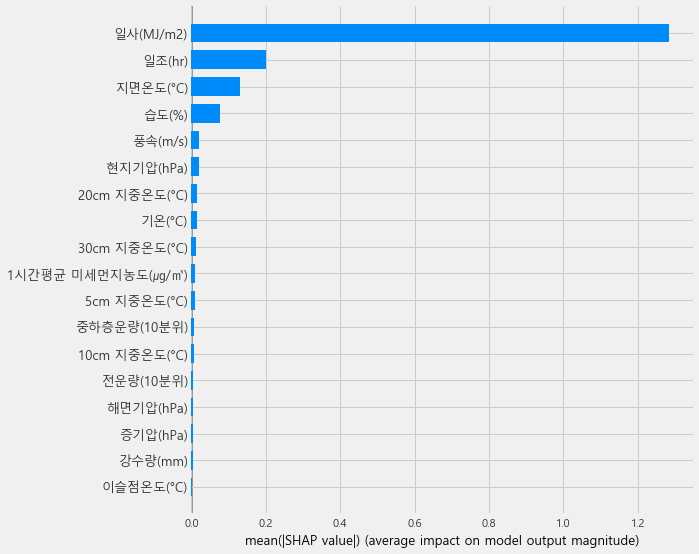

In [54]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

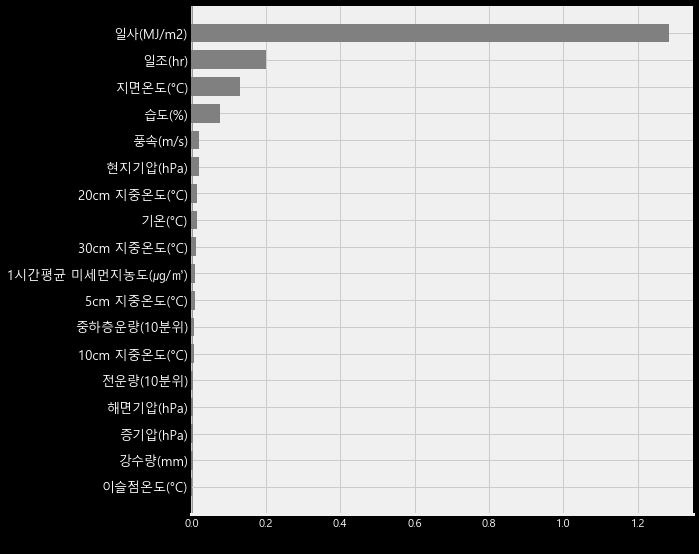

In [55]:
fig = plt.figure(figsize = (16, 12))
fig.set_facecolor('k')
shap.summary_plot(shap_values, x_test, plot_type="bar", color = 'grey',  axis_color ='w')

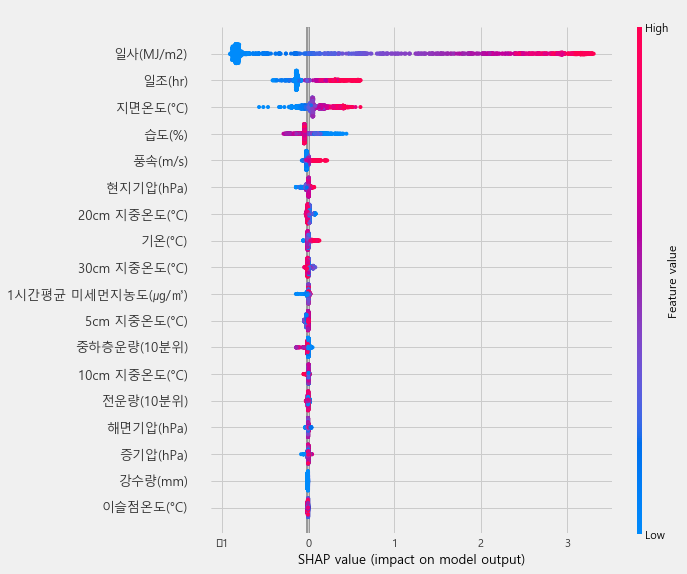

In [56]:
shap.summary_plot(shap_values, x_test)

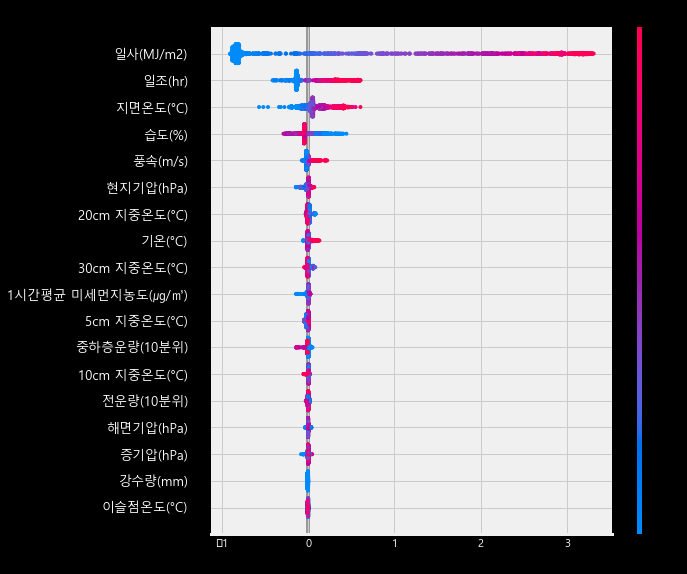

In [57]:
fig = plt.figure(figsize = (16, 12))
fig.set_facecolor('k')
shap.summary_plot(shap_values, x_test, color = 'w', axis_color ='w')

In [17]:
x_test.head(10)

,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),1시간평균 미세먼지농도(㎍/㎥),월,시간
0,3.752980,0.0,3.852271,51.509406,4.114649,-5.282941,1018.110740,1025.005925,0.000000,0.000000,0,0,1.851991,7.275870,7.700751,10.027267,10.227274,11.861939,4,0
1,3.431826,0.0,3.749933,51.968281,4.033700,-5.496110,1017.991982,1024.887168,0.000000,0.000000,0,0,1.452042,6.893582,7.325369,9.776510,10.039876,9.511936,4,1
2,3.028354,0.0,2.856350,53.400707,4.035955,-5.540227,1017.881355,1024.776540,0.000000,0.000000,0,0,0.989557,6.532316,7.074613,9.510126,9.939869,12.206303,4,2
3,3.139956,0.0,3.097572,53.319407,4.079733,-5.444885,1017.810740,1024.705925,0.000000,0.000000,0,0,0.908996,6.292070,6.687208,9.310126,9.901136,9.241293,4,3
4,2.739377,0.0,2.794502,56.650400,4.250348,-5.016781,1017.670434,1024.557489,0.000000,0.000000,0,0,0.574036,5.955421,6.320823,9.236257,9.713730,9.399484,4,4
5,2.950196,0.0,2.558708,59.477462,4.500146,-4.147948,1017.681355,1024.576540,0.000000,0.000000,0,0,0.466199,5.725685,6.185687,8.962967,9.613730,13.315013,4,5
6,2.692766,0.0,2.622703,62.459295,4.626690,-3.809011,1018.178564,1025.081879,0.000000,0.000000,0,0,0.387455,5.501060,5.934931,8.712210,9.452464,9.191811,4,6
7,2.683704,0.0,1.519728,64.639044,4.772284,-3.315031,1018.875722,1025.770908,0.259013,0.362948,0,0,0.722179,5.360814,5.810306,8.598095,9.362974,14.276282,4,7
8,5.340595,0.0,1.862665,56.854528,5.056266,-2.549666,1018.884196,1025.687168,0.986582,0.880600,0,0,3.409934,5.905297,6.020245,8.436828,9.303220,10.803077,4,8
9,7.305416,0.0,3.975427,45.672515,4.685314,-3.641266,1019.308242,1026.054648,1.000000,1.505152,1,0,8.367159,7.198169,6.799601,8.398095,9.355489,9.251040,4,9


In [27]:
y_test.head()

일시
2019-04-01    0.0
2019-04-01    0.0
2019-04-01    0.0
2019-04-01    0.0
2019-04-01    0.0
Name: 태양광 전력거래량\n(단위: MWh), dtype: float64

In [28]:
# 2019년 4월 1일 아침 10시
doc_num = 8
print('Actual Label:', y_test.iloc[doc_num])
print('Predicted Label:', pred[doc_num])
shap.force_plot(explainer.expected_value, shap_values[doc_num,:], x_test.iloc[doc_num,:])

Actual Label: 0.897537
Predicted Label: 1.2305255


In [30]:
shap.force_plot(explainer.expected_value, shap_values[:100,:], x_test.iloc[:100,:])

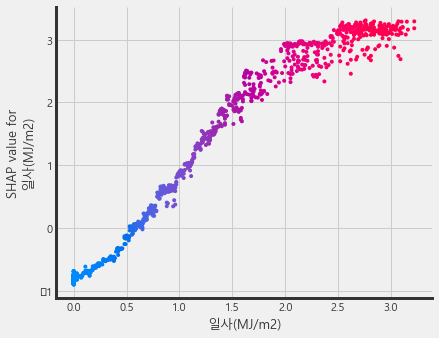

In [60]:
shap.dependence_plot(ind='일사(MJ/m2)', interaction_index='일사(MJ/m2)',
                     shap_values=shap_values, 
                     features=x_test,  
                     display_features=x_test)

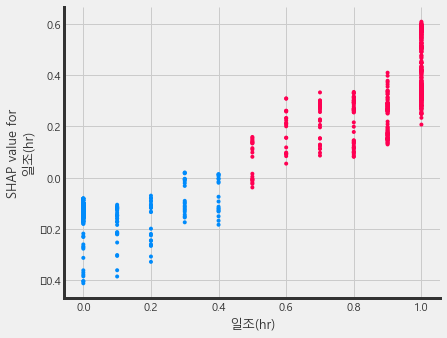

In [61]:
shap.dependence_plot(ind='일조(hr)', interaction_index='일조(hr)',
                     shap_values=shap_values, 
                     features=x_test,  
                     display_features=x_test)

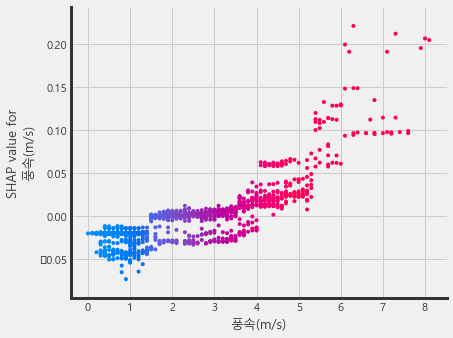

In [62]:
shap.dependence_plot(ind='풍속(m/s)', interaction_index='풍속(m/s)',
                     shap_values=shap_values, 
                     features=x_test,  
                     display_features=x_test)

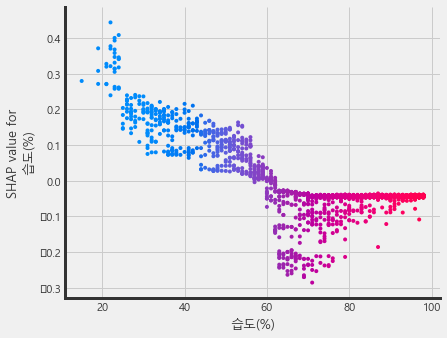

In [63]:
shap.dependence_plot(ind='습도(%)', interaction_index='습도(%)',
                     shap_values=shap_values, 
                     features=x_test,  
                     display_features=x_test)

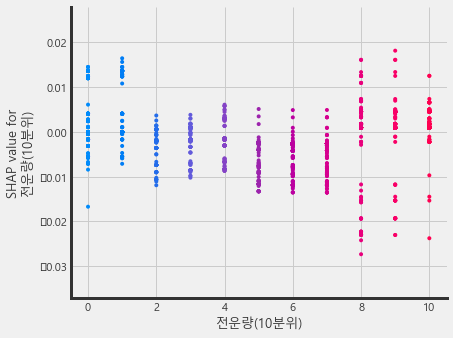

In [64]:
shap.dependence_plot(ind='전운량(10분위)', interaction_index='전운량(10분위)',
                     shap_values=shap_values, 
                     features=x_test,  
                     display_features=x_test)

In [55]:
explainer_train = shap.TreeExplainer(reg)
shap_values_train = explainer.shap_values(x_train)
print('Expected Value:', explainer_train.expected_value)
pd.DataFrame(shap_values_train).head()

Expected Value: [1.04625257]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.006817,-0.00053,-0.005559,-0.039086,-0.00118,-0.000186,-0.007243,0.000241,-0.130337,-0.779404,-0.005757,-0.006946,0.052122,0.001542,0.005285,-0.005015,-0.008539,-0.010439,-0.060907,-0.025083
1,0.006817,-0.00053,-0.005559,-0.039086,-0.00118,-0.000186,-0.007243,0.000319,-0.135211,-0.781424,-0.005757,-0.002150,0.052125,0.001542,0.005285,-0.005015,-0.008539,-0.008539,-0.060790,-0.025083
2,0.007486,-0.00053,-0.005558,-0.039348,-0.00118,-0.000186,-0.007243,0.000347,-0.130337,-0.784368,-0.005757,-0.005164,0.052365,0.001542,0.005283,-0.005015,-0.008539,-0.008729,-0.060189,-0.025083
3,0.006817,-0.00053,-0.005559,-0.039086,-0.00118,-0.000186,-0.007243,0.000241,-0.130337,-0.781424,-0.005757,-0.006946,0.052125,0.001542,0.005285,-0.005015,-0.008539,-0.008539,-0.060790,-0.025083
4,0.006817,-0.00053,-0.003422,-0.039086,-0.00118,-0.000186,-0.007243,0.000319,-0.135211,-0.781424,-0.005757,-0.002150,0.052188,0.001542,0.005285,-0.005202,-0.008539,-0.008539,-0.060790,-0.025083


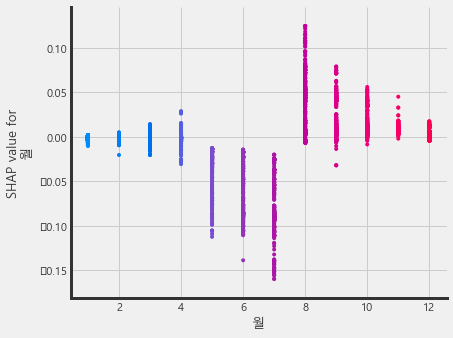

In [56]:
shap.dependence_plot(ind='월', interaction_index='월',
                     shap_values=shap_values_train, 
                     features=x_train ,  
                     display_features=x_train)

In [60]:
x_test.columns

Index(['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)',
       '중하층운량(10분위)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', '1시간평균 미세먼지농도(㎍/㎥)', '월', '시간'],
      dtype='object')

In [58]:
x_train_bad = x_train.drop('일사(MJ/m2)', axis =1)
x_train_bad = x_train_bad.drop('일조(hr)', axis =1)
x_train_bad = x_train_bad.drop('지면온도(°C)', axis =1)
x_test_bad = x_test.drop('일사(MJ/m2)', axis =1)
x_test_bad = x_test_bad.drop('일조(hr)', axis =1)
x_test_bad = x_test_bad.drop('지면온도(°C)', axis =1)

In [59]:
reg_bad = xgb.XGBRegressor()
reg_bad.fit(x_train_bad, y_train,
        eval_set=[(x_train_bad, y_train), (x_test_bad, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [60]:
bad_pred = reg_bad.predict(x_test_bad)

In [61]:
print('nMAE:',nmae(y_true=y_test, y_pred=bad_pred))             

nMAE: 0.050576685977712955


In [62]:
a = pd.DataFrame()
a['MWh real'] = y_test
a['MWh prediction'] = bad_pred
b = a.reset_index(drop=True)
c = b[:54]

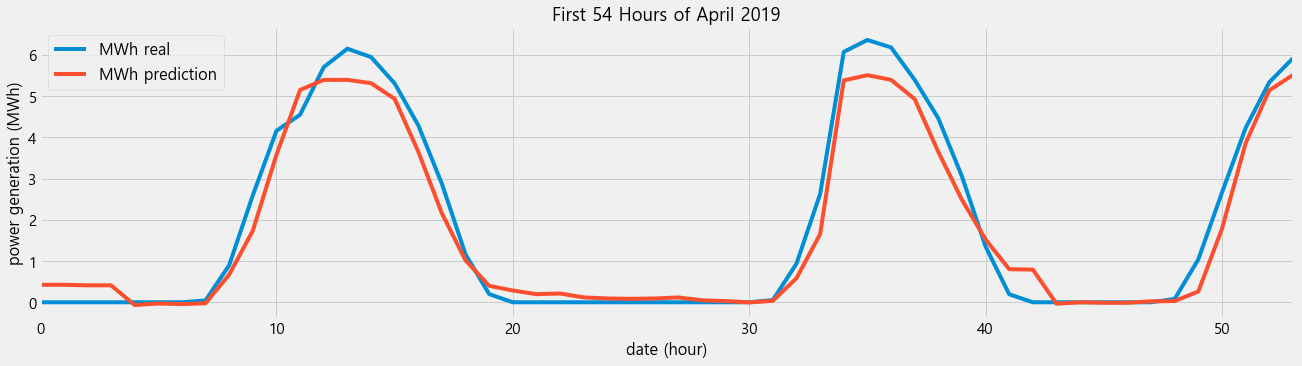

In [63]:
gen1 = c.plot(figsize=(20, 5))
gen1.set_title("First 54 Hours of April 2019", fontsize = 18)
plt.legend(fontsize=16)
gen1.tick_params(which='minor', length=2)
plt.ylabel('power generation (MWh)', fontsize = 16)
plt.xlabel('date (hour)', fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
f = gen1.get_figure()
fg = f.savefig('solar_gen_compare_bad.png')

No handles with labels found to put in legend.


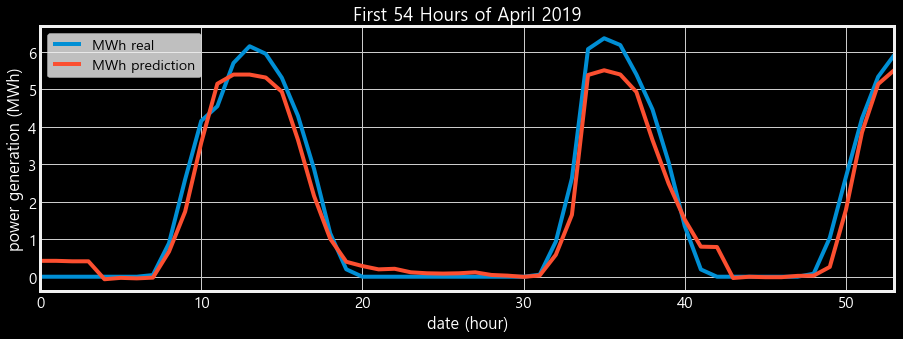

In [64]:
fig = plt.figure()
fig.set_facecolor('k')
ax1 = fig.add_subplot(2,2, 1)
ax1.set_facecolor('k')
ax1.tick_params(axis='x', colors='w')
ax1.tick_params(axis='y', colors='w')
ax1.legend(fontsize=16)
ax1.tick_params(which='minor', length=2)
plt.ylabel('power generation (MWh)', fontsize = 16, color = 'w')
plt.xlabel('date (hour)', fontsize = 16, color='w')
plt.xticks(fontsize = 15, color='w')
plt.yticks(fontsize = 15, color='w')
t = ax1.set_title("First 54 Hours of April 2019", fontsize = 18, color='w')
gen1 = c.plot(figsize=(30, 10), ax = ax1)

In [467]:
x_test.columns

Index(['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)',
       '중하층운량(10분위)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', '1시간평균 미세먼지농도(㎍/㎥)', '시간', '월'],
      dtype='object')

In [65]:
x_train_final = x_train[[ '일조(hr)', '일사(MJ/m2)', '지면온도(°C)', '기온(°C)', '습도(%)', '시간']]
x_test_final = x_test[['일조(hr)', '일사(MJ/m2)', '지면온도(°C)', '기온(°C)', '습도(%)', '시간']]

In [66]:
reg_final = xgb.XGBRegressor(n_estimators=1000, max_depth= 5, min_child_weight=1, subsample=0.5)
#reg = xgb.XGBRegressor(n_estimators=1000)
reg_final.fit(x_train_final, y_train,
        eval_set=[(x_train_final, y_train), (x_test_final, y_test)],
        early_stopping_rounds=50,
       verbose=False)
final_pred = reg_final.predict(x_test_final)

In [67]:
print('nMAE:',nmae(y_true=y_test,
                   y_pred=final_pred))

nMAE: 0.03160004770018925


In [68]:
x_train_final = x_train[[ '일조(hr)', '일사(MJ/m2)', '지면온도(°C)', '시간']]
x_test_final = x_test[['일조(hr)', '일사(MJ/m2)', '지면온도(°C)', '시간']]

In [69]:
x_train_final.columns

Index(['일조(hr)', '일사(MJ/m2)', '지면온도(°C)', '시간'], dtype='object')

In [70]:
reg_final = xgb.XGBRegressor(n_estimators=1000, max_depth= 4, min_child_weight=8, subsample=0.7)
#reg = xgb.XGBRegressor(n_estimators=1000)
reg_final.fit(x_train_final, y_train,
        eval_set=[(x_train_final, y_train), (x_test_final, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=8, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7)

In [71]:
final_pred = reg_final.predict(x_test_final)

In [72]:
print('nMAE:',nmae(y_true=y_test,
                   y_pred=final_pred))

nMAE: 0.03051601532708116


In [110]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

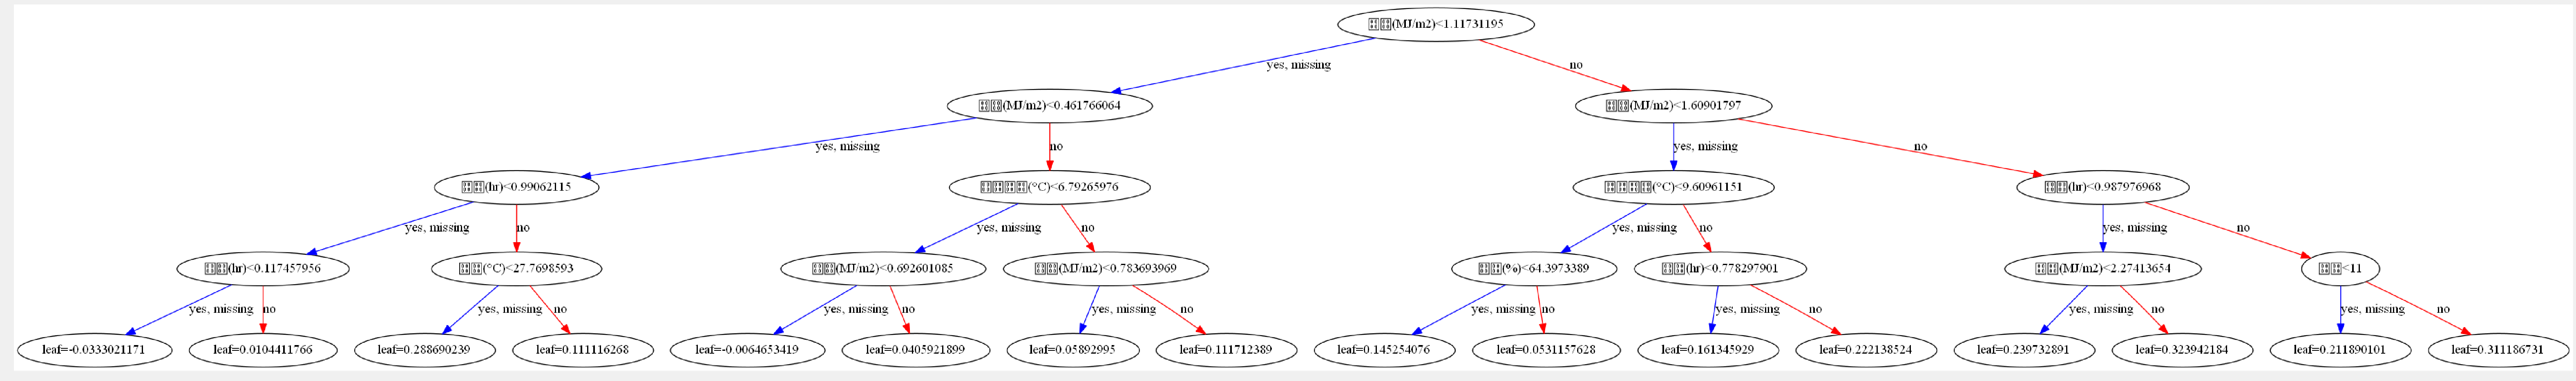

In [113]:
fig, ax = plt.subplots(figsize=(100, 80))
plot_tree(reg_final, ax=ax, num_trees = 3)

In [73]:
a = pd.DataFrame()
a['MWh real'] = y_test
a['MWh prediction'] = final_pred
b = a.reset_index(drop=True)
c = b[:54]

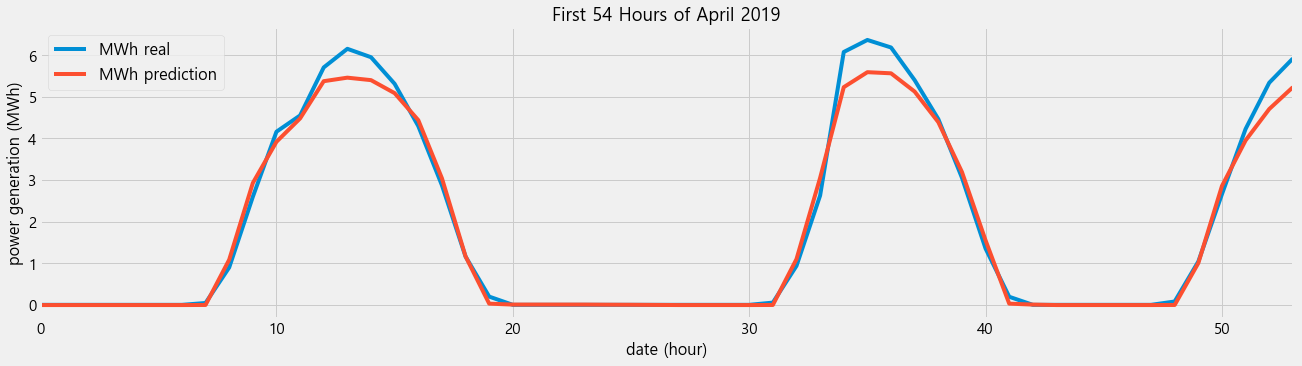

In [74]:
gen1 = c.plot(figsize=(20, 5))
gen1.set_title("First 54 Hours of April 2019", fontsize = 18)
plt.legend(fontsize=16)
gen1.tick_params(which='minor', length=2)
plt.ylabel('power generation (MWh)', fontsize = 16)
plt.xlabel('date (hour)', fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
f = gen1.get_figure()
fg = f.savefig('solar_gen_compare_major_features.png')

No handles with labels found to put in legend.


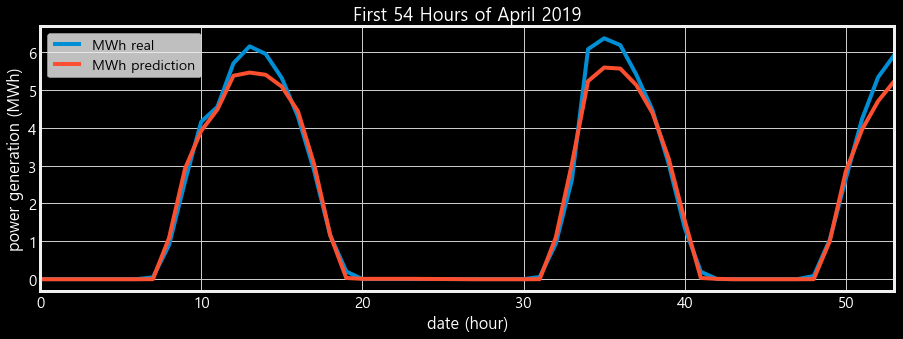

In [69]:
fig = plt.figure()
fig.set_facecolor('k')
ax1 = fig.add_subplot(2,2, 1)
ax1.set_facecolor('k')
ax1.tick_params(axis='x', colors='w')
ax1.tick_params(axis='y', colors='w')
ax1.legend(fontsize=16)
ax1.tick_params(which='minor', length=2)
plt.ylabel('power generation (MWh)', fontsize = 16, color = 'w')
plt.xlabel('date (hour)', fontsize = 16, color='w')
plt.xticks(fontsize = 15, color='w')
plt.yticks(fontsize = 15, color='w')
t = ax1.set_title("First 54 Hours of April 2019", fontsize = 18, color='w')
gen1 = c.plot(figsize=(30, 10), ax = ax1)

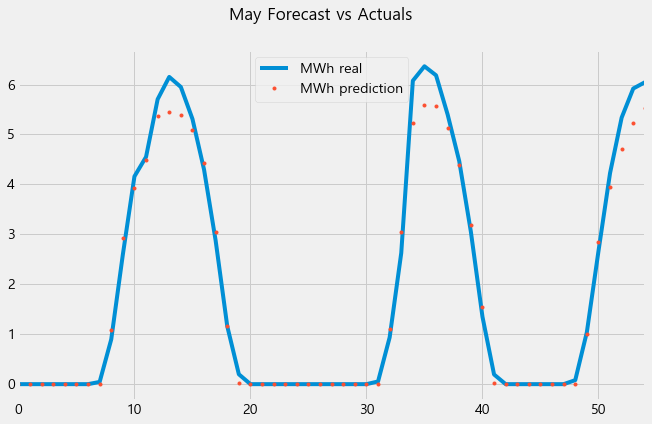

In [70]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(10)
_ = b[:55].plot(ax=ax, style=['-','.'])
                                         
plot = plt.suptitle('May Forecast vs Actuals')

In [ ]:
fg = f.savefig('gen_compare.png')

In [ ]:
gen1 = plot.plot(figsize=(20, 5))
gen1.set_title("1st week of November 2018", fontsize = 18)
plt.legend(fontsize=14)
gen1.xaxis.set_minor_locator(AutoMinorLocator())
gen1.tick_params(which='minor', length=2)
plt.ylabel('power generation (MW)', fontsize = 16)
plt.xlabel('date', fontsize = 16)
gen1.set_xticks([0, 24, 48, 72, 96, 120, 144])
gen1.set_xticklabels(plot1.index[0::24], fontsize = 13)
plt.yticks(fontsize = 13)
f = gen1.get_figure()